In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
df = pd.read_parquet('final_df.parquet')
dataset = df[['is_nsfw', 'display_state', 'flags.os_hidden', 'flags.os_is_nsfw', 'flags.code_verified', 'flags.functions_threshold', 'flags.approval_threshold', 'flags.bytecode_threshold', 'flags.did_self_destruct', 'flags.is_whitelisted_proxy', 'display_stats.floor_price', 'display_stats.supply', 'display_stats.holders', 'display_stats.one_day_volume', 'display_stats.seven_day_volume', 'display_stats.thirty_day_volume', 'display_stats.total_volume', 'external.telegram_total_member', 'external.has_instagram', 'external.discord_total_member', 'external.has_twitter', 'deceptive_word_count', 'sentiment', 'topic']]

In [3]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (39629, 24)
Unseen Data For Predictions: (4403, 24)


In [4]:
exp_mclf101 = setup(data = data, target = 'display_state', session_id=123, fold_shuffle=True, imputation_type='iterative', 
                    remove_multicollinearity = True)  

,Description,Value
0,session_id,123
1,Target,display_state
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(39629, 24)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9710,0.9971,0.9319,0.9707,0.9707,0.9616,0.9616,0.6390
rf,Random Forest Classifier,0.9703,0.9970,0.9186,0.9699,0.9697,0.9606,0.9607,0.4700
gbc,Gradient Boosting Classifier,0.9695,0.9972,0.9250,0.9691,0.9691,0.9596,0.9597,3.8280
et,Extra Trees Classifier,0.9645,0.9957,0.9044,0.9639,0.9638,0.9529,0.9530,0.4420
dt,Decision Tree Classifier,0.9603,0.9744,0.9181,0.9611,0.9605,0.9475,0.9475,0.0410
lda,Linear Discriminant Analysis,0.9340,0.9840,0.6810,0.9275,0.9293,0.9121,0.9128,0.0620
ridge,Ridge Classifier,0.9328,0.0000,0.8070,0.9308,0.9259,0.9104,0.9113,0.0750
knn,K Neighbors Classifier,0.8518,0.9509,0.7994,0.8554,0.8526,0.8038,0.8044,0.6720
ada,Ada Boost Classifier,0.6822,0.8116,0.6964,0.6805,0.6587,0.5809,0.5930,0.2480
qda,Quadratic Discriminant Analysis,0.4532,0.6472,0.3595,0.5181,0.3620,0.2808,0.4126,0.0750


In [6]:
print(best)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=F

In [7]:
evaluate_model(best[0])
evaluate_model(best[1])

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


In [8]:
md1 = create_model('rf')
md2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9712,0.9971,0.9453,0.9709,0.9710,0.9618,0.9618
1,0.9661,0.9957,0.9180,0.9653,0.9656,0.9551,0.9552
2,0.9726,0.9984,0.9425,0.9731,0.9726,0.9637,0.9639
3,0.9722,0.9985,0.9221,0.9715,0.9718,0.9632,0.9633
4,0.9712,0.9963,0.9388,0.9711,0.9710,0.9618,0.9619
5,0.9733,0.9955,0.9380,0.9730,0.9731,0.9647,0.9647
6,0.9708,0.9972,0.9439,0.9721,0.9711,0.9614,0.9615
7,0.9676,0.9975,0.9160,0.9668,0.9670,0.9570,0.9571
8,0.9776,0.9977,0.9531,0.9775,0.9775,0.9704,0.9705


In [9]:
tuned_md1 = tune_model(md1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9542,0.9872,0.9237,0.9572,0.9547,0.9394,0.9400
1,0.9456,0.9869,0.8878,0.9481,0.9461,0.9279,0.9283
2,0.9531,0.9887,0.8923,0.9556,0.9532,0.9379,0.9385
3,0.9510,0.9896,0.9033,0.9540,0.9515,0.9351,0.9356
4,0.9521,0.9876,0.9130,0.9554,0.9527,0.9365,0.9371
5,0.9488,0.9870,0.9171,0.9513,0.9492,0.9323,0.9327
6,0.9474,0.9880,0.9230,0.9536,0.9486,0.9304,0.9312
7,0.9484,0.9868,0.9225,0.9517,0.9492,0.9318,0.9322
8,0.9582,0.9898,0.9353,0.9608,0.9586,0.9447,0.9451


In [10]:
tuned_md2 = tune_model(md2, custom_grid={'learning_rate':[i/200 for i in range(1, 21)]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9715,0.9975,0.9337,0.9710,0.9712,0.9623,0.9623
1,0.9672,0.9970,0.9187,0.9664,0.9666,0.9565,0.9566
2,0.9730,0.9985,0.9400,0.9731,0.9728,0.9642,0.9643
3,0.9719,0.9987,0.9276,0.9714,0.9715,0.9628,0.9628
4,0.9719,0.9967,0.9363,0.9717,0.9717,0.9628,0.9628
5,0.9712,0.9968,0.9272,0.9708,0.9708,0.9618,0.9619
6,0.9719,0.9972,0.9475,0.9733,0.9722,0.9628,0.9630
7,0.9704,0.9974,0.9178,0.9696,0.9698,0.9608,0.9609
8,0.9784,0.9977,0.9566,0.9783,0.9783,0.9714,0.9714


In [11]:
tuned_md2

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


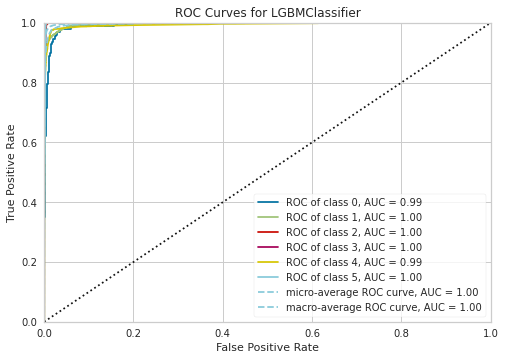

In [12]:
plot_model(tuned_md2, plot = 'auc')

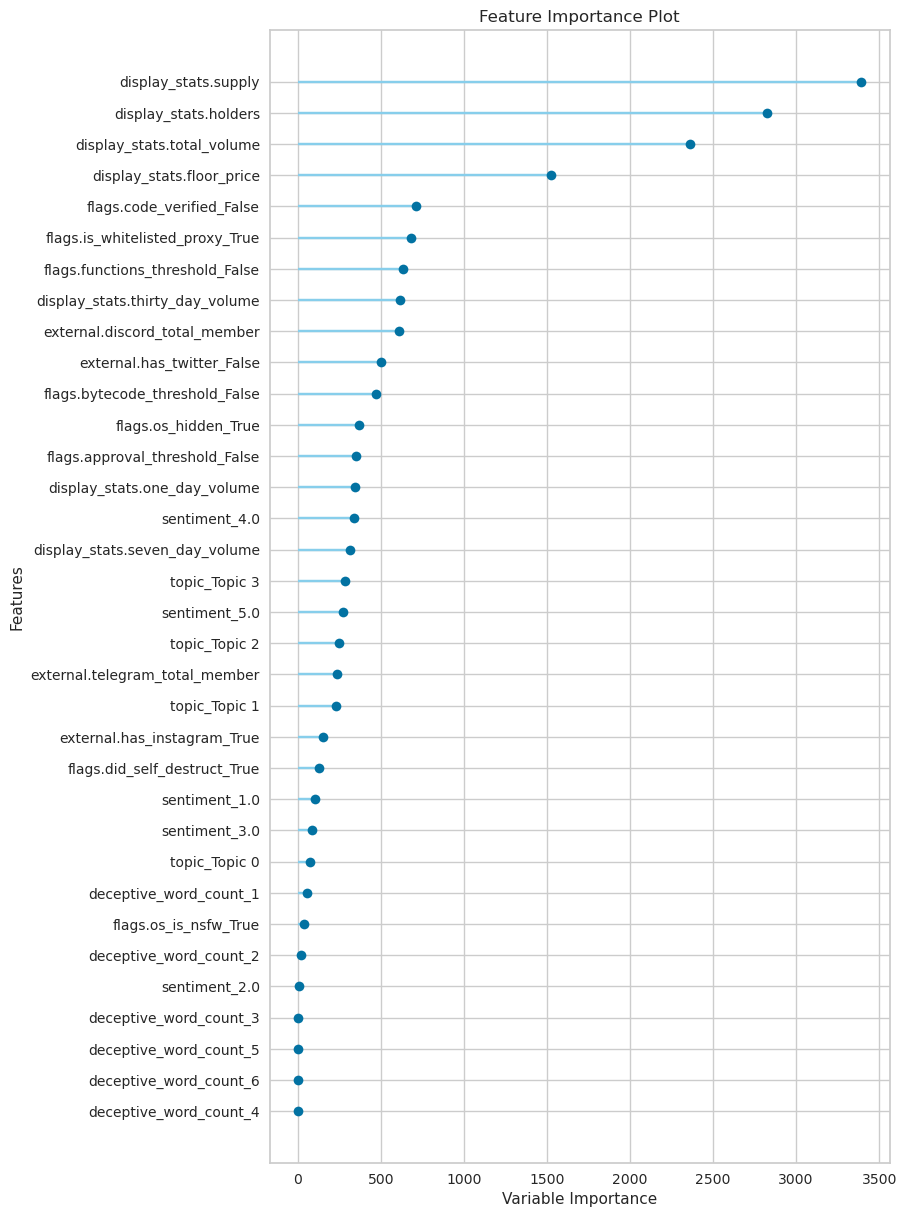

In [13]:
plot_model(tuned_md2, plot = 'feature_all')

In [14]:
evaluate_model(tuned_md2)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.05
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [15]:
predict_model(tuned_md2, encoded_labels=True);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9722,0.9973,0.9286,0.9719,0.9719,0.9632,0.9633


In [16]:
final_md = finalize_model(tuned_md2)

In [17]:
test_predictions = predict_model(final_md, data=data_unseen)
test_predictions.head(100)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9687,0.9969,0.9395,0.9688,0.9686,0.9584,0.9585


,is_nsfw,display_state,flags.os_hidden,flags.os_is_nsfw,flags.code_verified,flags.functions_threshold,flags.approval_threshold,flags.bytecode_threshold,flags.did_self_destruct,flags.is_whitelisted_proxy,...,display_stats.total_volume,external.telegram_total_member,external.has_instagram,external.discord_total_member,external.has_twitter,deceptive_word_count,sentiment,topic,Label,Score
0,False,5,False,False,False,False,False,True,False,False,...,0.00000,0,False,0,False,0,4.0,Topic 1,5,0.9986
1,False,4,False,False,True,True,False,True,False,False,...,3.00000,0,False,0,False,0,4.0,Topic 1,4,0.7639
2,False,5,False,False,False,False,False,True,False,False,...,0.00000,0,False,0,False,0,4.0,Topic 1,5,0.9935
3,False,5,False,False,False,False,False,True,False,False,...,0.00000,0,False,0,False,0,4.0,Topic 1,5,0.9990
4,False,4,False,False,True,True,False,True,False,False,...,0.10000,0,True,0,False,0,5.0,Topic 3,4,0.9885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,4,False,False,True,True,False,True,False,False,...,0.00000,0,False,0,False,0,4.0,Topic 1,4,0.9986
96,False,4,False,False,True,True,True,True,False,False,...,0.10748,0,False,0,True,1,5.0,Topic 1,4,0.9973
97,False,4,False,False,True,True,True,True,False,False,...,0.00000,0,False,0,True,0,5.0,Topic 1,4,0.9980
98,False,1,False,False,True,True,False,False,False,True,...,0.00000,0,False,0,False,0,4.0,Topic 1,1,0.9997


In [18]:
save_model(final_md,'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='display_state',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                    

In [19]:
saved_final_md = load_model('final_model')

Transformation Pipeline and Model Successfully Loaded


In [20]:
new_prediction = predict_model(saved_final_md, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9687,0.9969,0.9395,0.9688,0.9686,0.9584,0.9585
